<a href="https://colab.research.google.com/github/hikkaaaa/machine-learning/blob/main/pandas_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                          Intro to Linear Regression with Scikit-Learn
# **Intro to Linear Regression Models:**

In [30]:
#linear regressoin - can help us predict the future based on the past data
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes #sklearn.dataset - gives us access to various dataset
                                          #in this case, we imported load_diabetes dataset
diabetes = load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [31]:
#as you can see, it simply gives us a dictionary (json), so we have to convert it into dataframe
df = pd.DataFrame(diabetes.data, columns = diabetes.feature_names)
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [32]:
#we need a particular thing to predict the progression of the data
#add the target
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [33]:
#the target here was predetermined by the dataset itself, if you want to find out what target represnt here:
diabetes.DESCR
#eg in this case it is:  the response of interest, a quantitative measure of disease progression one year after baseline

'.. _diabetes_dataset:\n\nDiabetes dataset\n----------------\n\nTen baseline variables, age, sex, body mass index, average blood\npressure, and six blood serum measurements were obtained for each of n =\n442 diabetes patients, as well as the response of interest, a\nquantitative measure of disease progression one year after baseline.\n\n**Data Set Characteristics:**\n\n:Number of Instances: 442\n\n:Number of Attributes: First 10 columns are numeric predictive values\n\n:Target: Column 11 is a quantitative measure of disease progression one year after baseline\n\n:Attribute Information:\n    - age     age in years\n    - sex\n    - bmi     body mass index\n    - bp      average blood pressure\n    - s1      tc, total serum cholesterol\n    - s2      ldl, low-density lipoproteins\n    - s3      hdl, high-density lipoproteins\n    - s4      tch, total cholesterol / HDL\n    - s5      ltg, possibly log of serum triglycerides level\n    - s6      glu, blood sugar level\n\nNote: Each of thes

In [34]:
#now we have to find the relationship between each feature with the label(target)

# **Train/ Test split for Linear Regression**

In [35]:
#split the data into X and y
X = df.drop('target', axis = 1) #bcus target is found only in column, axis = 1
y = df['target']
y.shape, X.shape

((442,), (442, 10))

In [36]:
#the gist of linear regression is to take your data and seperate it into two different parts
#1 - training part - what linear regression is going to be trained on, take the data and learn from it
#2 - testing part - take the trained model and test it
#generally the proportion of splitting would be 80# to training and 20% to testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

print(f"The training set shape: {X_train.shape, y_train.shape}") #training - 80%, so since 100% row is 442, 80% is - 353
print(f"The testing set shape: {X_test.shape, y_test.shape}") #testing - 20%, so since 100% row is 442, 20% is - 89

The training set shape: ((353, 10), (353,))
The testing set shape: ((89, 10), (89,))


In [37]:
#the next thing is to actually create a linear regression model

# **Linear Regression and Residuals**

In [38]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

In [40]:
#train the model on the training set - this is how the model learns
lr.fit(X_train, y_train)

LinearRegression()

In [41]:
#predict on the testing set
#Y_preds are predicted values of the target variable based on the features
#once we have thode preds, we can compare them to the actual values of the target
#to evaluate the performance of the model
y_pred = lr.predict(X_test) #baically, these are predictions
y_pred.shape

(89,)

In [43]:
#getting all the metrics
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#evaluate the performance of the model
r2 = r2_score(y_test, y_pred) #variance of the dependent variable (target) explained by the independent variable(features)
                              #how well the model fits the data
                              #the higher, the better
                              #it can be <0 - very bad, or up to 1.0 - which is perfect
mse = mean_squared_error(y_test, y_pred) #average squared loss
                                         #the lower, the better
mae = mean_absolute_error(y_test, y_pred)#average absolute loss
                                         #the lower, the better
intercept = lr.intercept_#intercept: starting point of the regression line on the y-axis
                         #value of dependent variable(target) when the independent variable(features) are zero
                         #if positive, target increases as features increase, if negative - then the opposite happens


print("R2 score: ", r2)
print('Mean Squared Error: ', mse)
print('Mean Absolute Error: ', mae)
print('Intercept: ', intercept)


R2 score:  0.4526027629719195
Mean Squared Error:  2900.193628493482
Mean Absolute Error:  42.79409467959994
Intercept:  151.34560453985995


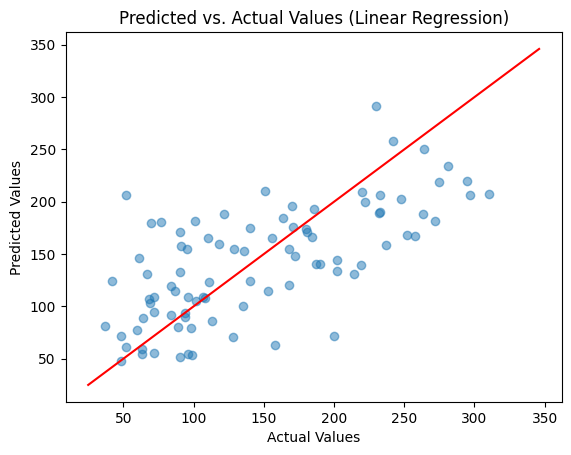

In [44]:
#graphing the scatter plot
import matplotlib.pyplot as plt

#plot the predicted vs. actual values
#predicted values of the target variable are plotted on the x-axis
#actual values of the target variable are plotted on the y-axis
#it tells you that if the model is a good fit, the points should be close to the diagonal line,
#indicating a strong linear relationship between the actual ans predicted values
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color = 'red')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values (Linear Regression)')
plt.show()

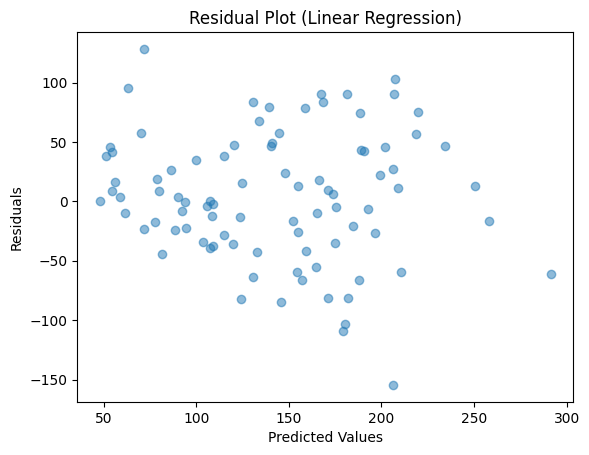

In [45]:
#plot the residuals
#the residuals are plotted against the predicted values of the target variables
#if the linear regression model is a good fit for the data,
#then the residual plot should show  a random scatter of the point around zero
#with no discernable trend

plt.scatter(y_pred, y_test - y_pred, alpha = 0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot (Linear Regression)")
plt.show()